# Задание 1

### Генератор

In [1]:
from tabnanny import verbose
from zlib import crc32
import numpy as np
from jedi.inference.gradual.typing import Callable
from sklearn.metrics import f1_score

types = ['regression', 'classification']
datasets = {'regression': [{'name': 'Servo Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Servo'},
                           {'name': 'Forest Fires Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Forest+Fires'},
                           {'name': 'Boston Housing Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston'},
                           {'name': 'Diabetes Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'}],
            'classification': [{'name': 'Spambase Data Set',
                                'url': 'https://archive.ics.uci.edu/ml/datasets/Spambase'},
                               {'name': 'Wine Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine'},
                               {'name': 'Breast Cancer Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'},
                               {'name': 'MNIST',
                                'url': 'https://yann.lecun.com/exdb/mnist/'}]}
methods = {'regression': ['Линейная регрессия',
                          'Перцептрон',
                          'Надарая-Ватсона',
                          'SVR'],
           'classification': ['Логистическая регрессия',
                              'Перцептрон',
                              'k-ближайших соседей',
                              'Метод потенциальных функций',
                              'Метод Парзеновского окна',
                              'SVM']}
task = dict()
task['mail'] = "nikitin.artem.a@phystech.edu"
task['id'] = crc32(task['mail'].encode('utf-8'))
np.random.seed(task['id'])
task['type'] = np.random.choice(types)
task['dataset'] = np.random.choice(datasets[task['type']])
task['method'] = np.random.choice(
    methods[task['type']], size=3, replace=False).tolist()

task

{'mail': 'nikitin.artem.a@phystech.edu',
 'id': 2652199766,
 'type': np.str_('classification'),
 'dataset': {'name': 'Breast Cancer Data Set',
  'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'},
 'method': ['Метод потенциальных функций', 'SVM', 'k-ближайших соседей']}



### Датасет: [Breast Cancer Data Set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) (почта nikitin.artem.a@phystech.edu)
### Методы: `Метод потенциальных функций`, `SVM`, `k-ближайших соседей`

## 0. Предобработка и анализ выборки

Для начала загрузим данные и посмотрим на них

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
data_frame = pd.DataFrame(data.data, columns=data.feature_names)
data_frame['target'] = data.target
data_frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Посмотрим, есть ли среди данных неопределенности (None) и сразу на размер выборки

In [3]:
data_not_a_nan = data_frame.dropna()
print(
    f"Суммарное количество записей: {len(data_frame)}\nКоличество строк без NaN: {len(data_not_a_nan)}\nОни совпадают, значит неизвестных ячеек в таблице нет")

Суммарное количество записей: 569
Количество строк без NaN: 569
Они совпадают, значит неизвестных ячеек в таблице нет


Неопределенностей нет, это хорошо. Но данных довольно мало, могут возникнуть проблемы. Целевой признак состоит из 0 и 1, значит перед нами задача бинарной классификации. Посмотрим на количество тех и других

__Отступление__: вообще, я этот и многие другие графики вижу автоматически в JetBrains DataSpell, но не знаю, насколько такое считается. Прошу подсказать, могу ли я во 2ом дз ссылаться на них без построения?

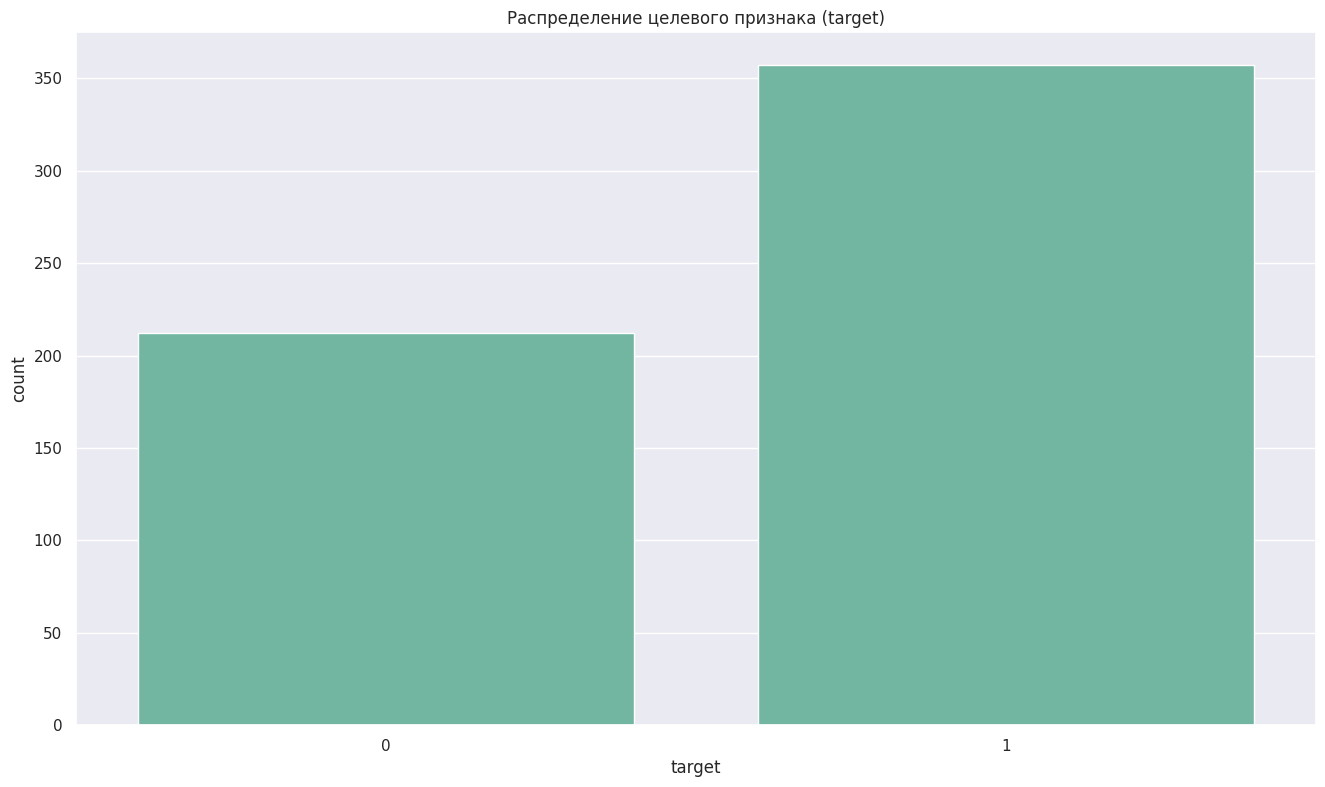

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(palette='Set2', rc={'figure.figsize': (16, 9)})

sns.countplot(data=data_frame, x='target')
plt.title('Распределение целевого признака (target)')
plt.show()

Посмотрим, с чем мы работаем.
У нас есть следующие признаки:
- Среднее расстояние от центра до точек по периметру (mean radius)
- Средние изменения в значениях серого цвета (mean texture)
- Среднее значение периметра (mean perimeter)
- Среднее значение площади (mean area)
- Средняя гладкость контура, то есть средние локальные изменения длины радиуса (mean smoothness)
- Средняя плотность, вычисленная как квадрат периметра, деленный на площадь, за вычетом 1. Этот признак зависит от двух вышеупомянутых (mean compactness)
- Средняя степень вогнутости (mean concavity)
- Среднее количество вогнутых участков контура (mean concave points)
- Средний коэффициент симметричности, то есть равномерность распределения клеток (mean symmetry)
- Средняя "детальность краев", то есть, аппроксимация береговой линии за вычетом 1, идеальной фигуры (mean fractal dimension)

И для всех этих 10 признаков так же посчитаны не только средние значения, но и стандартное отклонение (error) и наихудшие, то есть, наибольшие значения (worst)

Как мы видим, все признаки вещественны, некоторые зависят друг от друга. Данные не отнормированы

Мы должны научиться определять тип опухоли и предсказывать 1, если она злокачественная и 0 наоборот. В датасете преобладают злокачественные опухоли

Для удобства тип признака (среднее, ошибка или худший результат) переставим в начало

In [5]:
data_frame.rename(columns=lambda x: 'error ' + x[:-6] if x.endswith('error') else x, inplace=True)

Посмотрим на матрицу корреляции между признаками

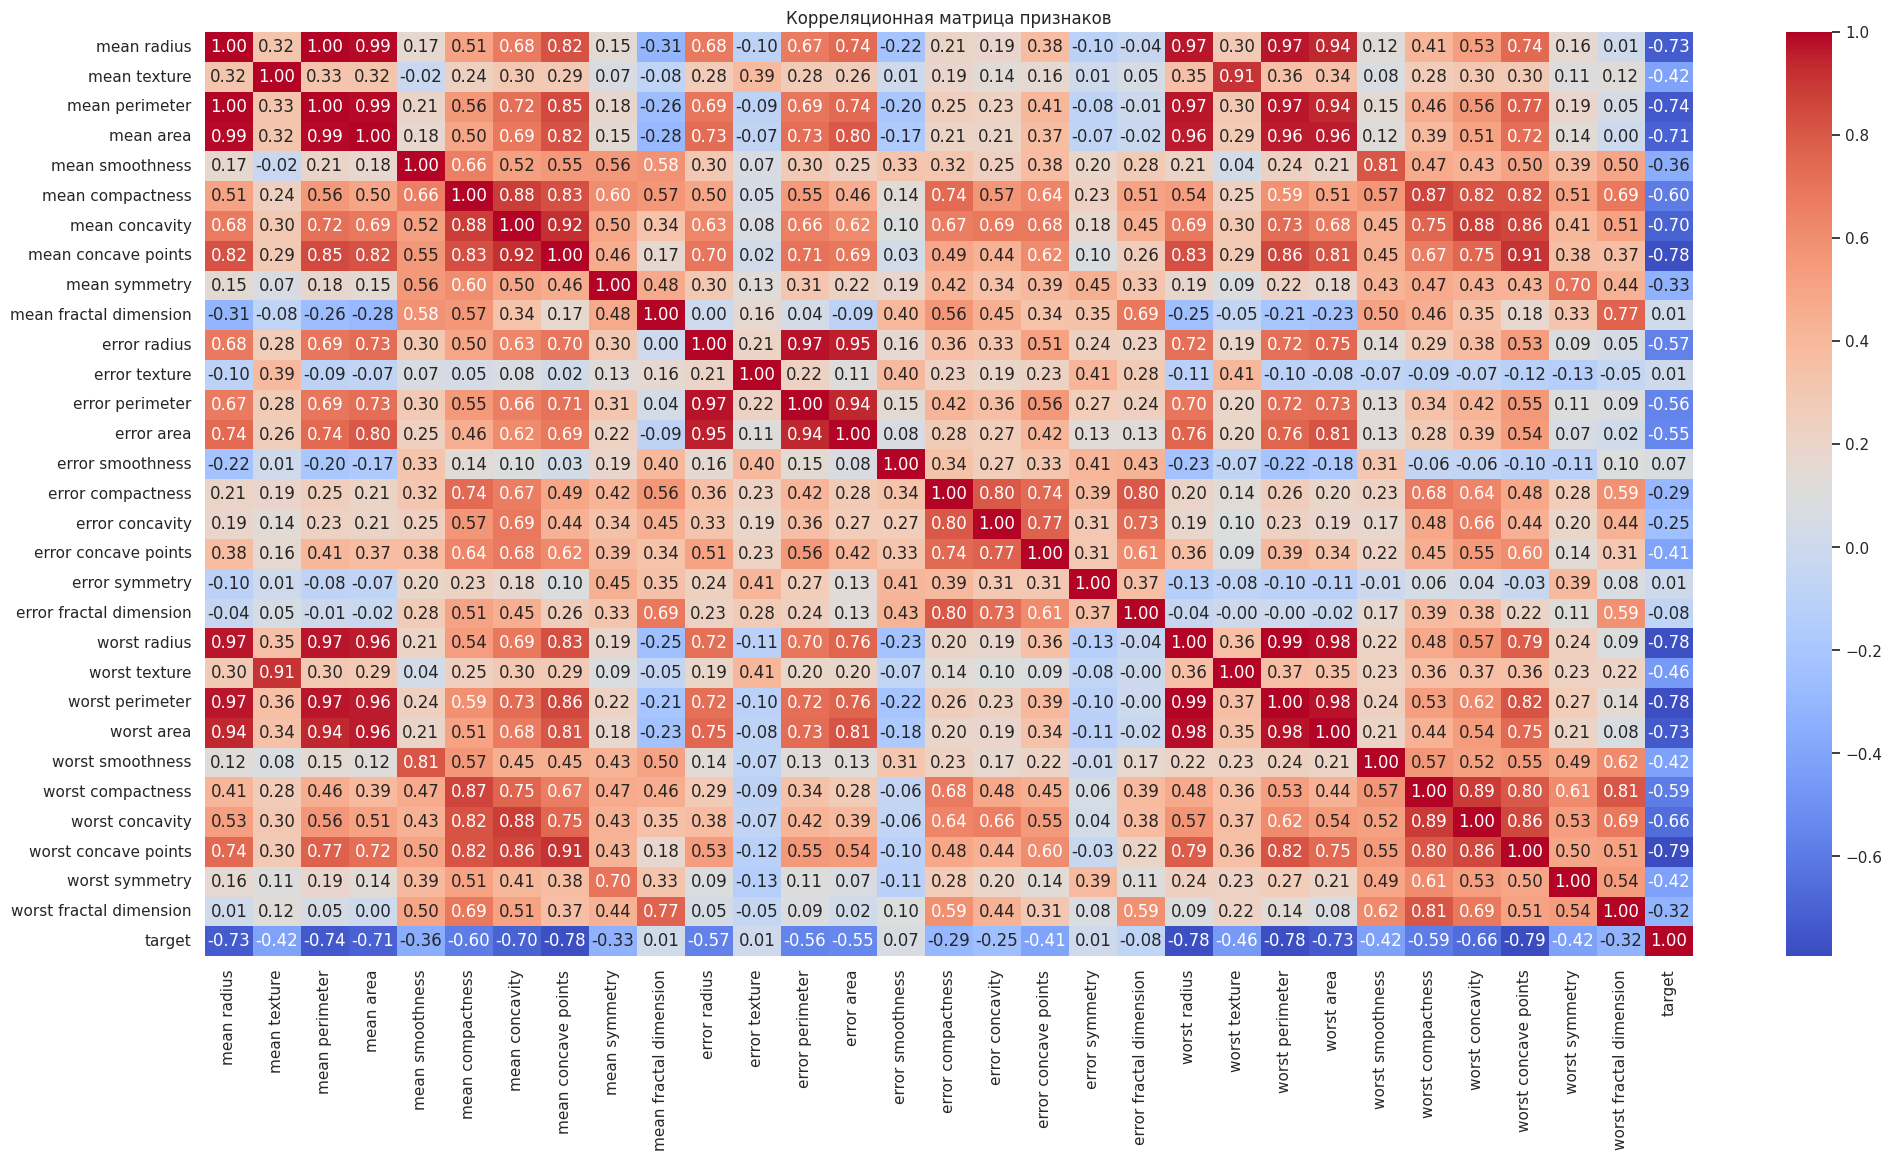

In [6]:
plt.figure(figsize=(24, 12))
sns.heatmap(data_frame.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Корреляционная матрица признаков')
plt.show()

Диагональ нам неинтересна, признаки сами себе положительно скоррелированы. 

Мы видим примерно одинаковую картинку для признаков радиуса, периметра и площади: между ними сильная зависимость

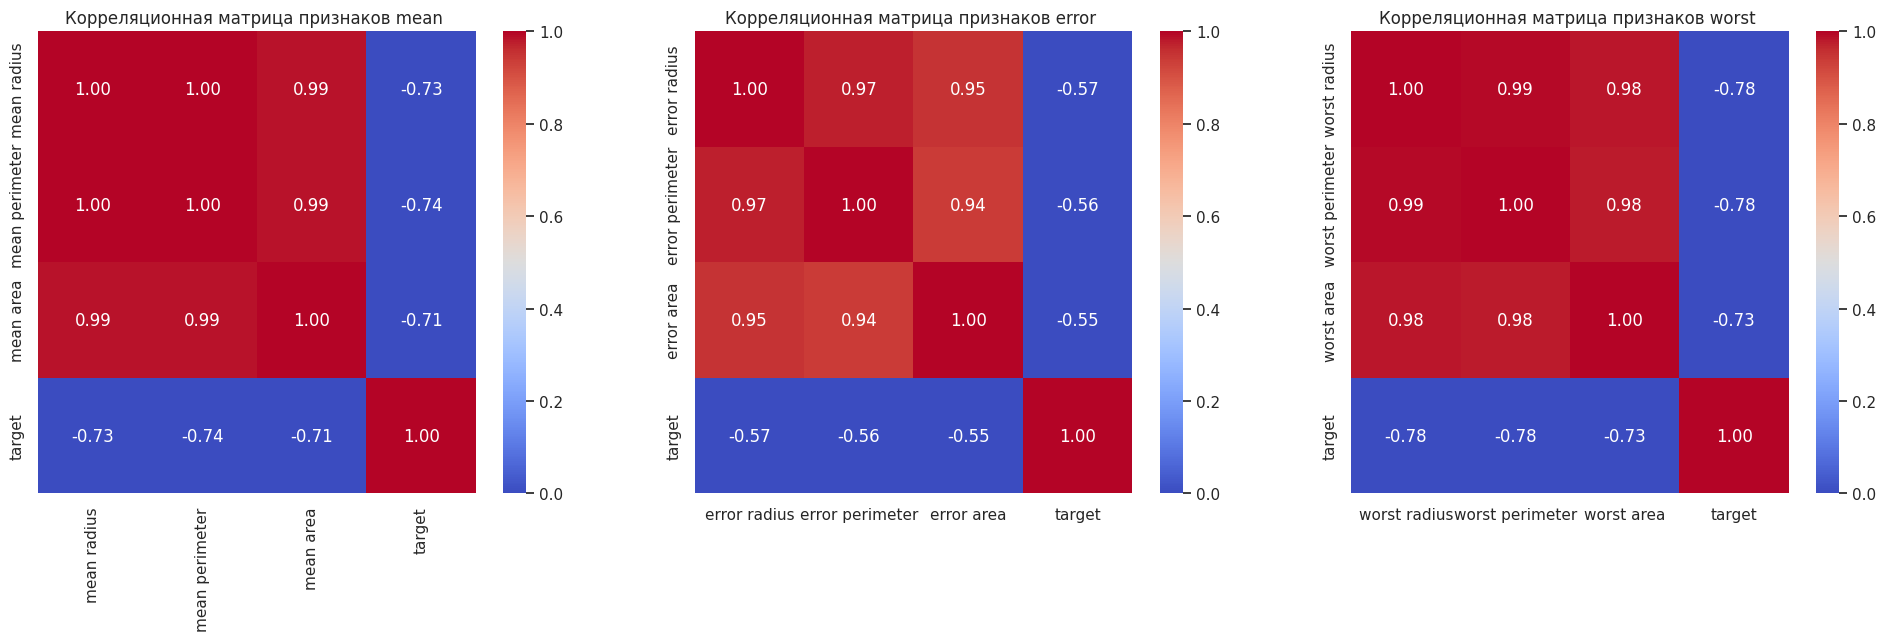

In [7]:
corr_features = pd.Series(['radius', 'perimeter', 'area'])
corr_types = ['mean ', 'error ', 'worst ']

fig, axs = plt.subplots(nrows=1, ncols=len(corr_types), figsize=(24, 6))
for i in range(len(axs)):
    features = pd.concat([corr_types[i] + corr_features, pd.Series(['target'])])
    sns.heatmap(data_frame[features].corr(), annot=True, fmt='.2f',
                cmap='coolwarm', cbar=True, vmin=0, vmax=1, ax=axs[i])
    axs[i].set_title(f'Корреляционная матрица признаков {corr_types[i]}')

plt.show()

Данные признаки действительно сильно скоррелированы, что логично, учитывая, что как правило опухоль равномерна по своей текстуре. Значения среднего локального изменения радиуса малы, а периметр и площадь фигуры выражаются через ее радиус, особенно если фигура хорошо приближена к окружности или эллипсу, как здесь. Так же это сказывается на корреляции средних и максимальных значений радиуса, периметра и площади. Все три признака по группам максимальности, ошибки и среднего примерно одинаково скоррелированы с целевым. Оставим только радиус и повторим для плотности, количества вогнутых участков и коэффициента вогнутости

In [8]:
for i in range(len(corr_types)):
    data_frame.drop(columns=corr_types[i] + corr_features[1:], inplace=True)
data_frame.drop(columns=['worst radius'], inplace=True)

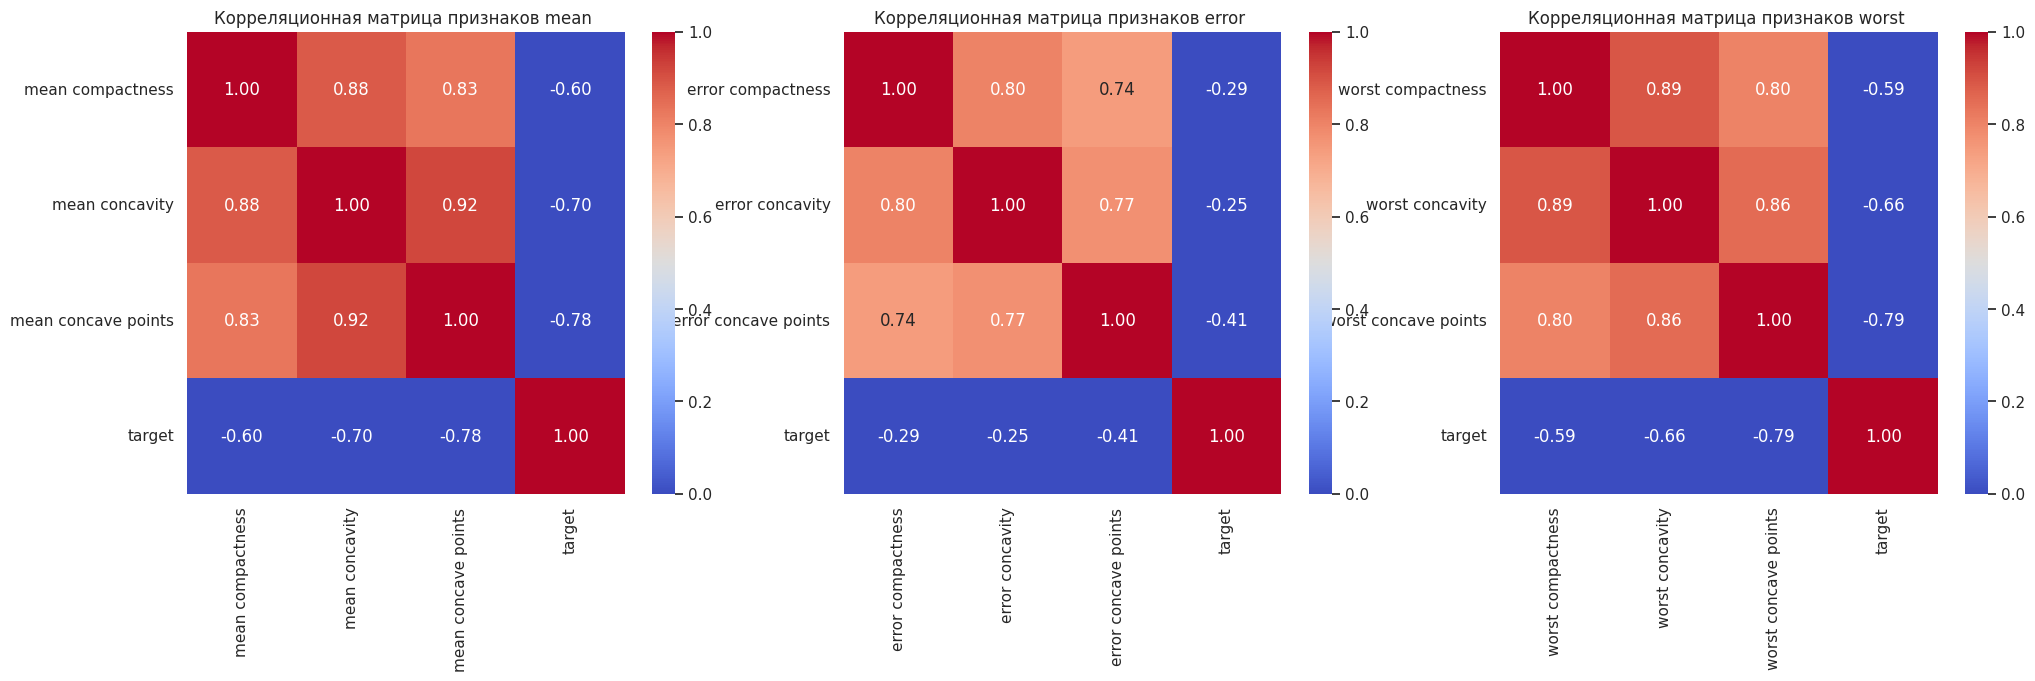

In [9]:
corr_features = pd.Series(['compactness', 'concavity', 'concave points'])
corr_types = ['mean ', 'error ', 'worst ']

fig, axs = plt.subplots(nrows=1, ncols=len(corr_types), figsize=(24, 6))
for i in range(len(axs)):
    features = pd.concat([corr_types[i] + corr_features, pd.Series(['target'])])
    sns.heatmap(data_frame[features].corr(), annot=True, fmt='.2f',
                cmap='coolwarm',
                cbar=True, vmin=0, vmax=1, ax=axs[i])
    axs[i].set_title(f'Корреляционная матрица признаков {corr_types[i]}')

plt.show()

Видим высокую корреляцию для каждой группы при примерно одинаковой с целевым. Это довольно логично, ведь все они связаны с формой и выпуклостью опухоли. Оставим количество выгнутых точек, ибо они имеют наибольшую корреляцию с целевым признаком. Хотя для разброса не так однозначно, так как корреляция с целевым признаком довольно мала, а корреляция между собой уже меньше 0.7, но разброс нам здесь нужен по сути для понимания, насколько важно оставлять максимальное и среднее значение одновременно, и оно для них мало

In [10]:
for i in range(len(corr_types)):
    data_frame.drop(columns=corr_types[i] + corr_features[:2], inplace=True)

Перестроим карту

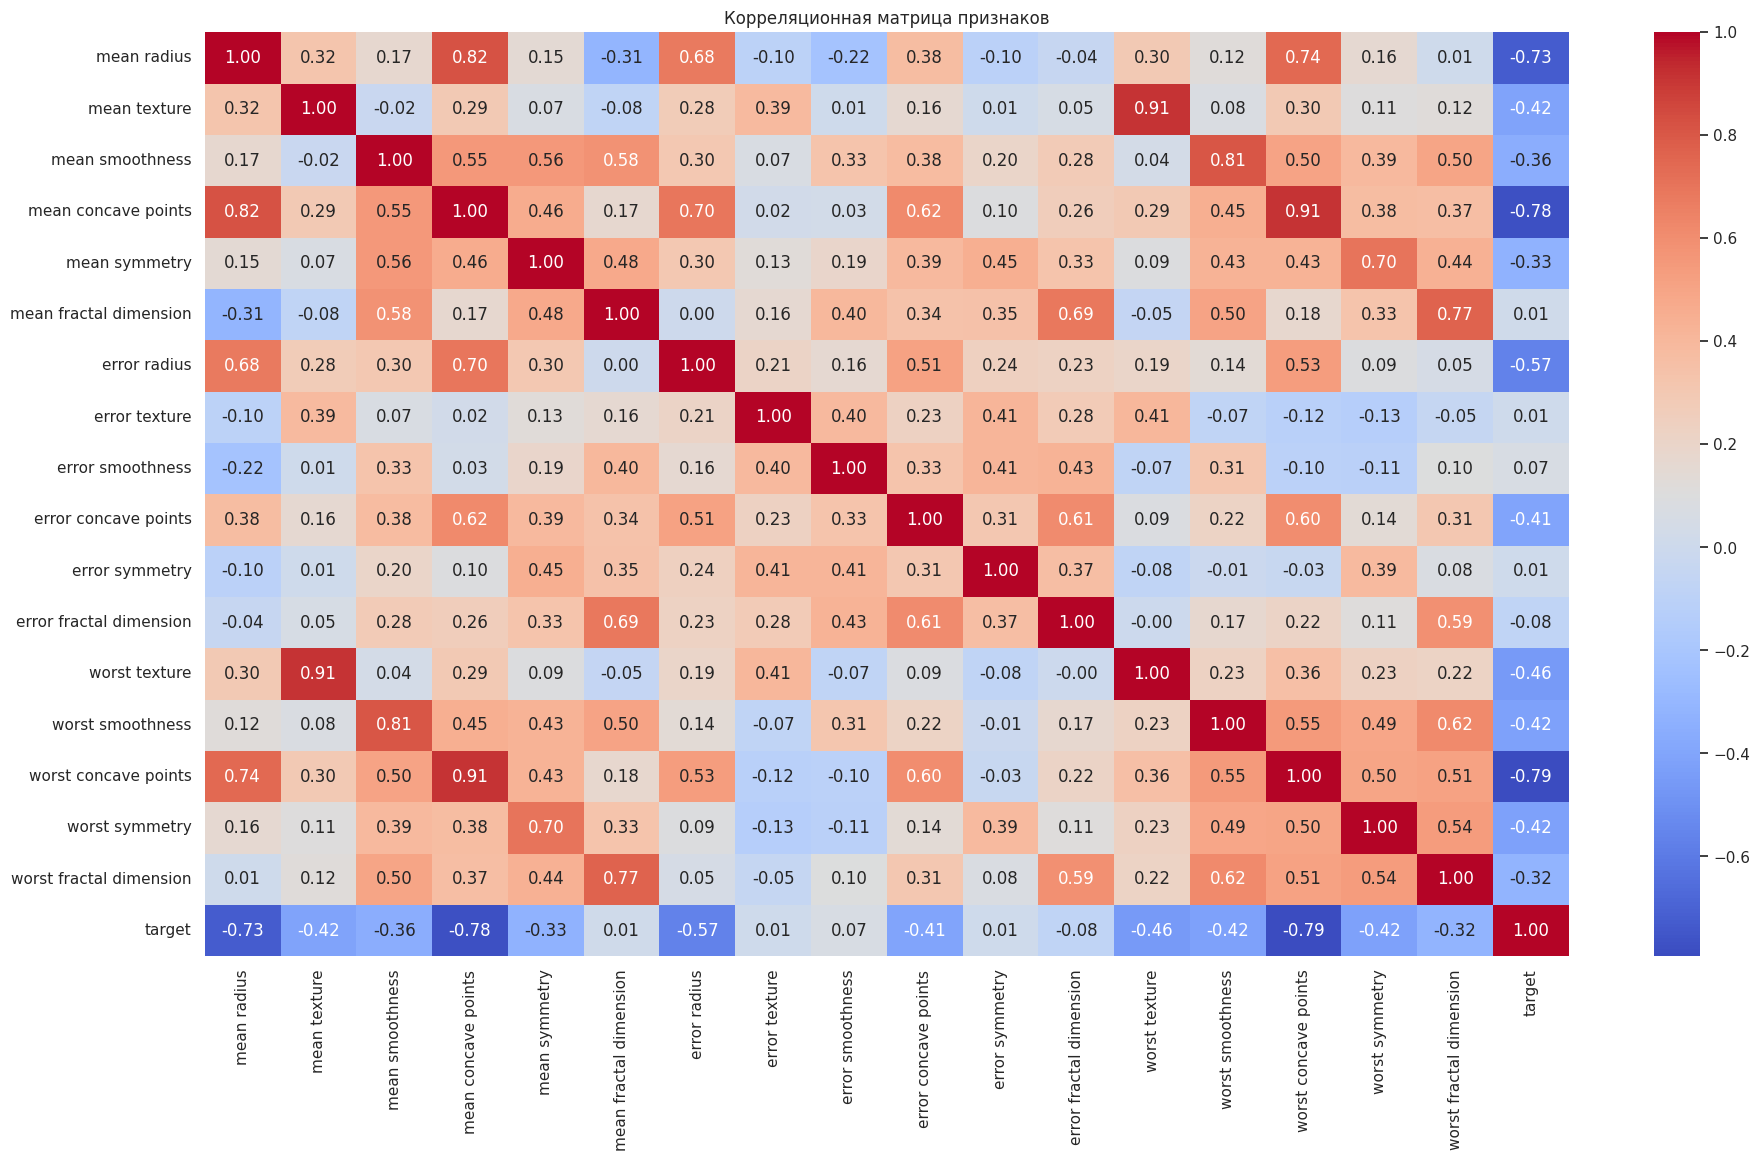

In [11]:
plt.figure(figsize=(22, 12))
sns.heatmap(data_frame.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Корреляционная матрица признаков')
plt.show()

Работать стало удобнее. Видим сильную корреляцию `worst texture` с `mean texture` при маленьком значении `error texture`, что означает, что разброс небольшой. Аналогичная история с `worst concave points` и `mean concave points`. Потому можем рассматривать только по одному из каждой пары с учетом малых значений `error`. Остальные признаки оставим. Несмотря на практически нулевую корреляцию, например, `error symmetry` с целевым признаком, он имеет корреляцию с остальными признаками, а потому может вносить малую поправку, потому стоит рассматривать.

In [12]:
data_frame.drop(columns=['worst texture', 'worst concave points'], inplace=True)

Снова перестроим карту, убедимся, что все хорошо

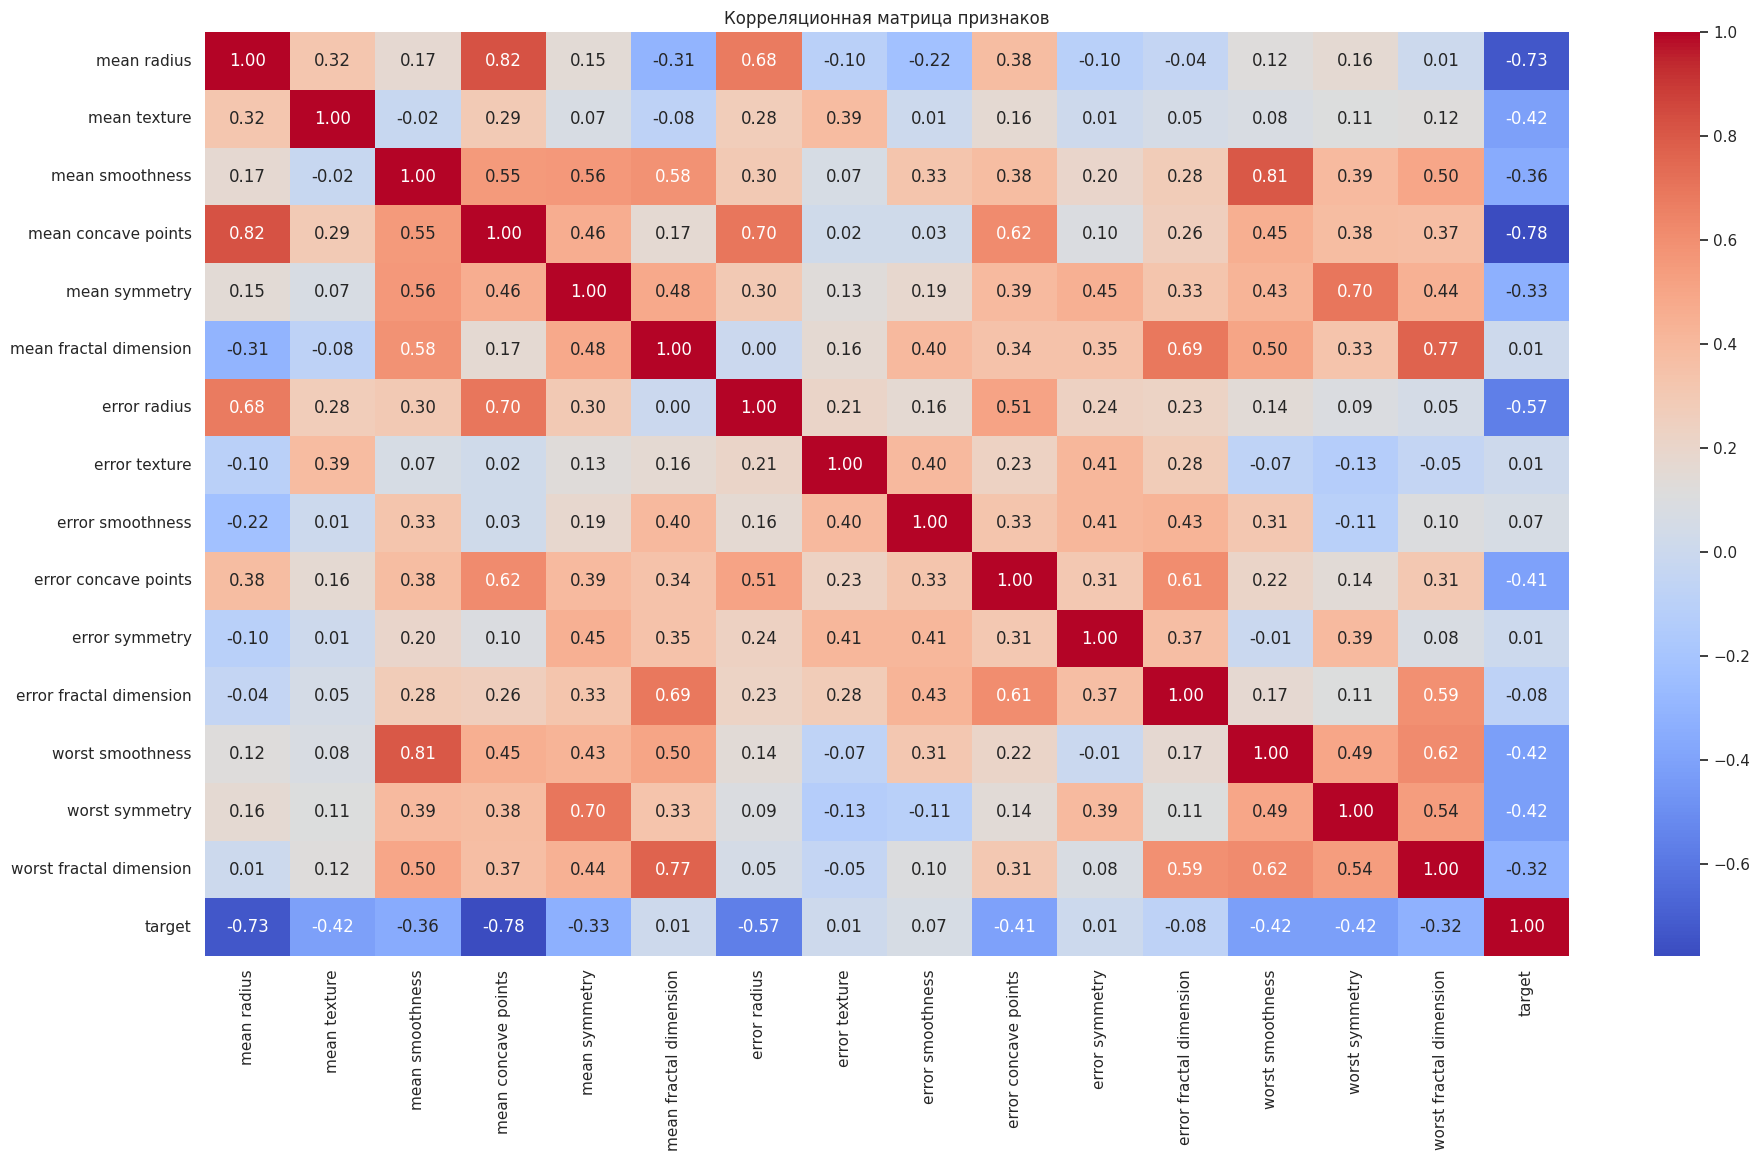

In [13]:
plt.figure(figsize=(22, 12))
sns.heatmap(data_frame.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Корреляционная матрица признаков')
plt.show()

Построим гистограммы плотностей по классам. Зеленое - опухоль доброкачественна, красное - злокачествена

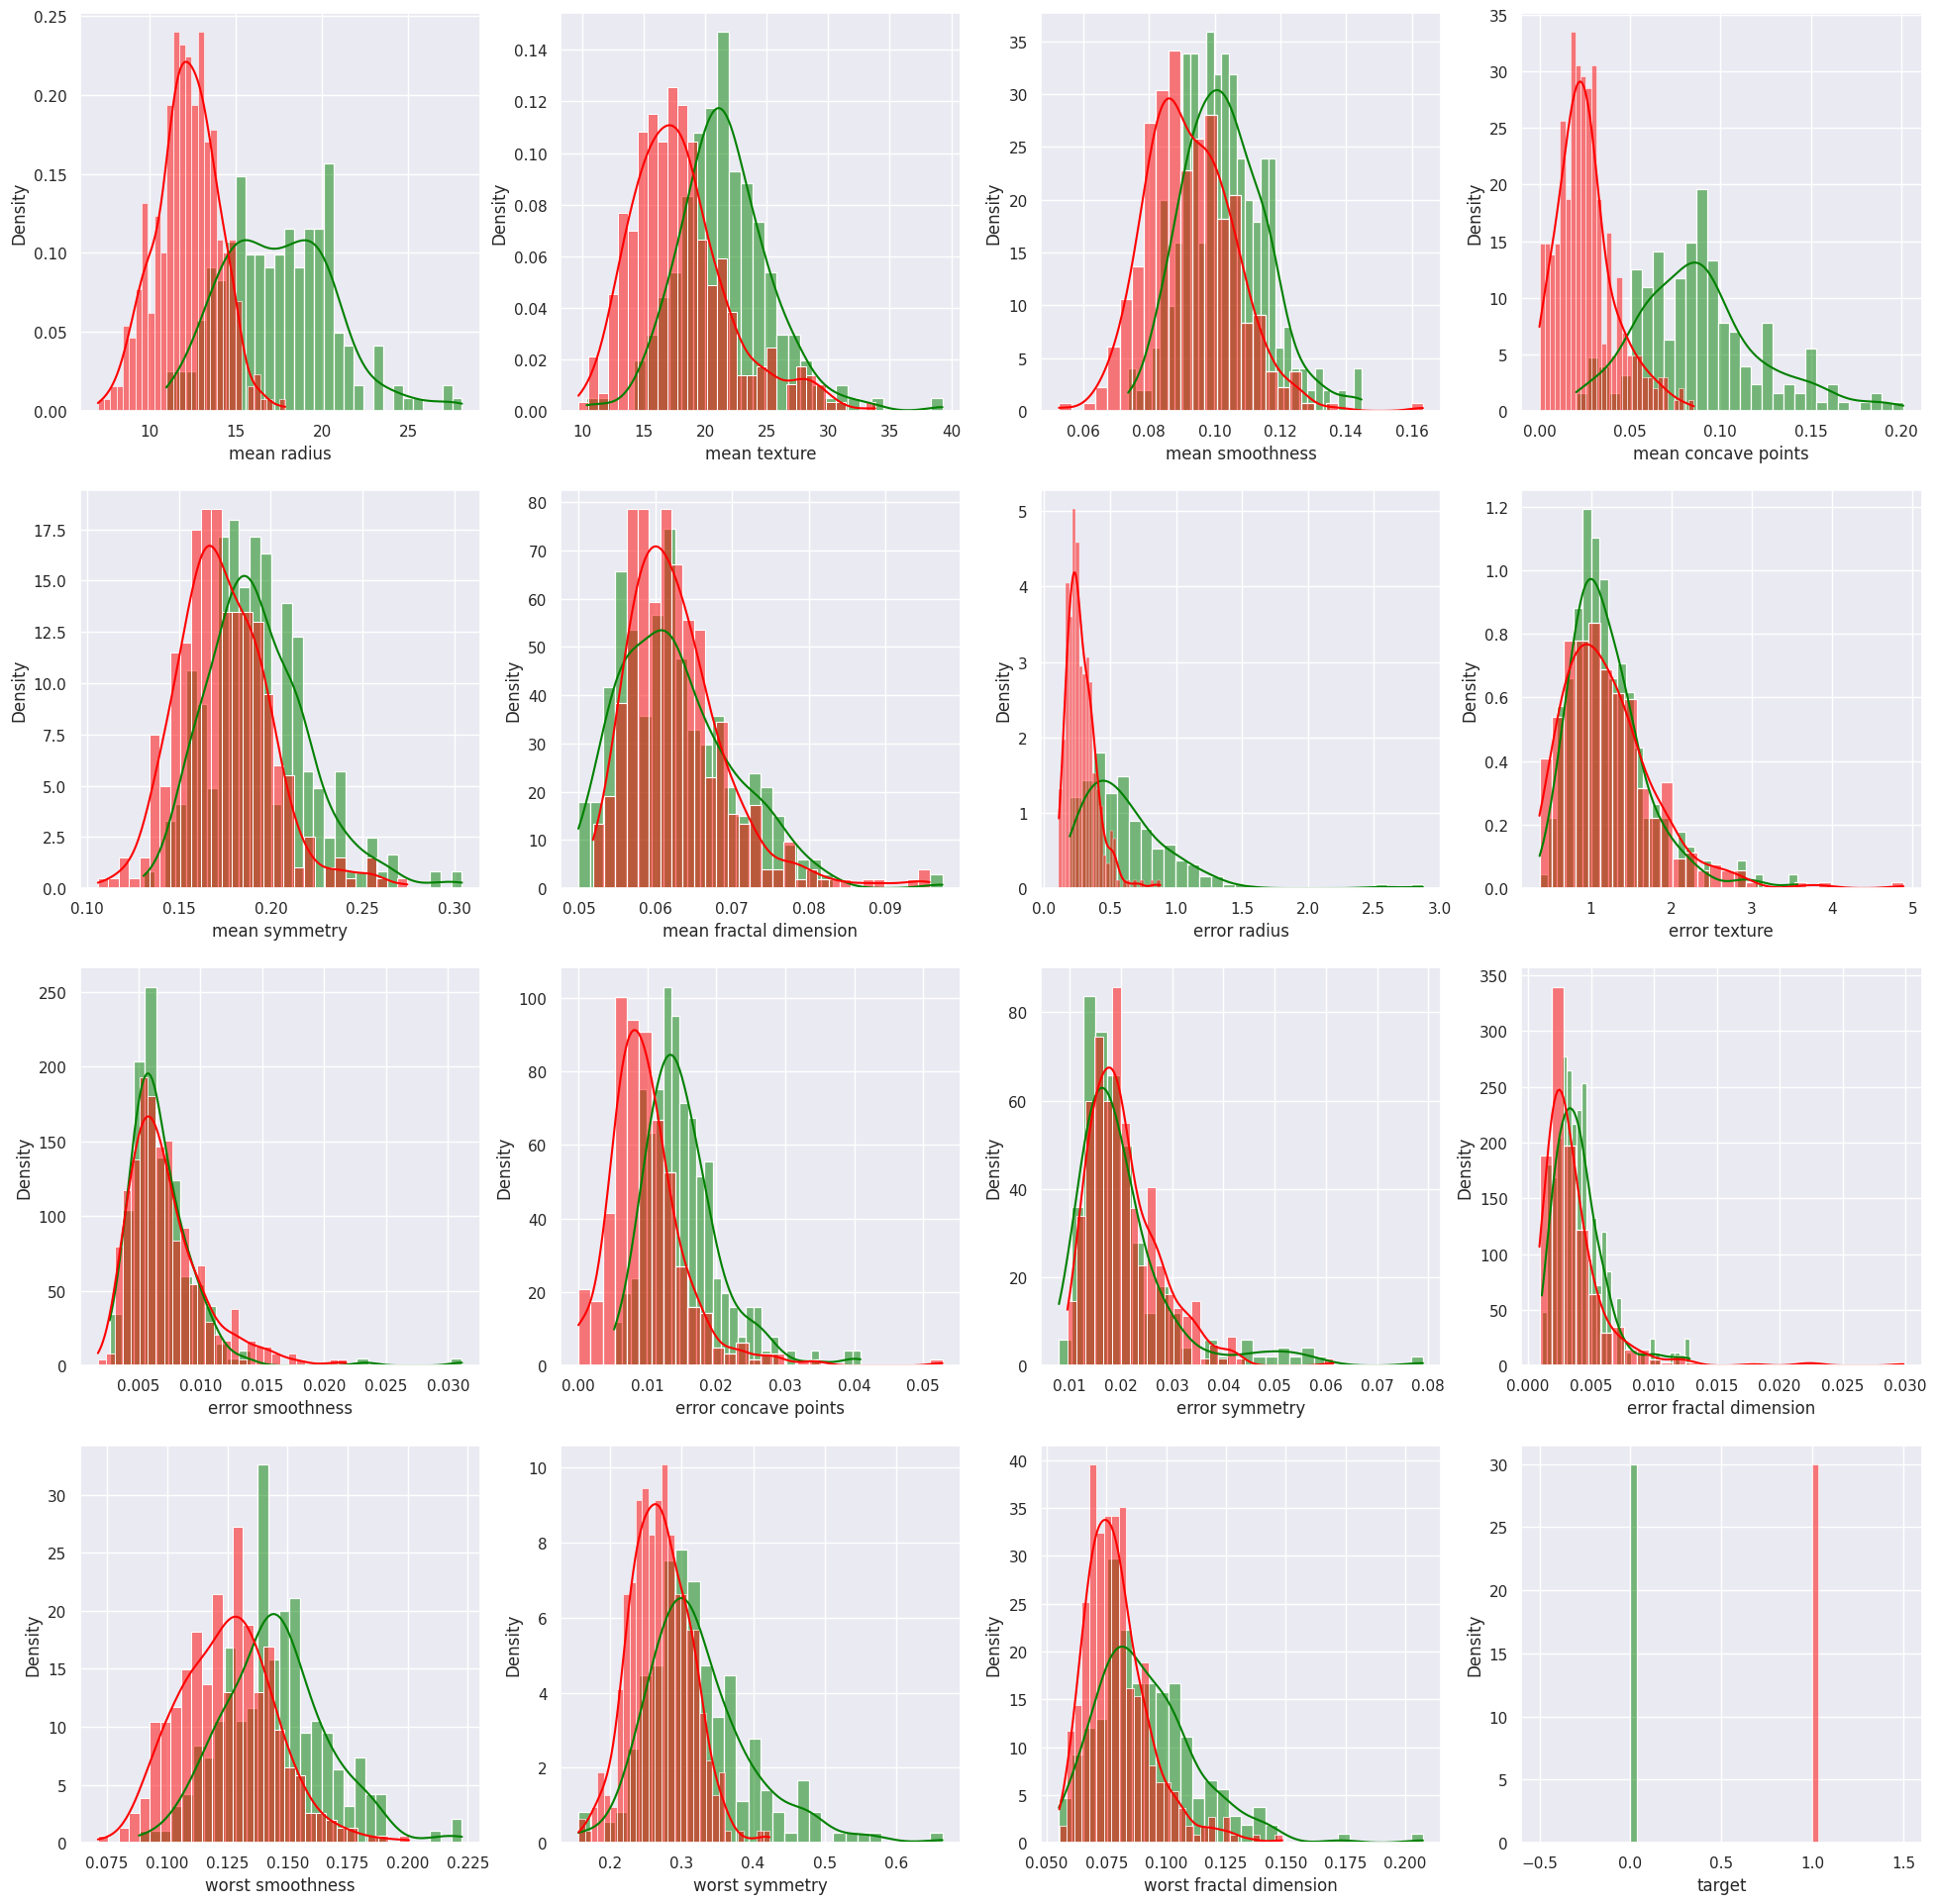

In [14]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(24, 24))

for i in range(data_frame.shape[1]):
    for target in [0, 1]:
        data_part = data_frame[data_frame["target"] == target].iloc[:, i]
        color = "green" if target == 0 else "red"
        sns.histplot(data_part, bins=30, color=color, stat="density", kde=True, ax=axs[i // 4][i % 4])

Как мы видим, по 11 признакам наблюдается разница между распределениями относительно целевого признака. Это может обещать нам хорошую разделяемость точек. При этом, распределение всех признаков близко к нормальному

Разделим данные на обучающую и тестовую части. Так как данных довольно мало (всего `569`), а увеличить их количество в рамках данной задачи не представляется возможным, то валидационную часть выделять не будем, так как:
- На каждую из тестовой и валидационной частей требуется определенное немалое количество данных. У нас бинарная классификация, а потому если сделать размеры частей недостаточными, то одно предсказание будет слишком сильно влиять на результат. Что, впрочем, верно для любой задачи
- Если выделить на обе части достаточное количество, то для тренировочной останется довольно мало

В связи с этим будем делить только на тренировочную и тестовую и использовать кросс-валидацию

Как мы видим, в целевом признаке имеет место некоторая упорядоченность (есть блоки вместе стоящих нулей и единиц), хотя их соотношение из столбчатого графика примерно 2 к 3. Дополнительно перемешаем строки данных, зафиксировав `seed` для воспроизводимости

In [15]:
from sklearn.model_selection import train_test_split

X = data_frame.drop(columns=['target'])
Y = data_frame['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, shuffle=True)

Подберем наилучший нормализатор. Как мы уже убедились, по классам признаки распределены примерно нормально, а так как суммой двух нормально распределенных величин является так же нормально распределенная, то будет предпочтительно использовать `StandartScaler`. Отнормируем данные

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

## 1. Эксперимент

### 1.1. Метод потенциальных функций

Возьмем код с семинара и модифицируем согласно методу потенциальных функций (сделаем $h$ множеством гиперпараметров для каждого $x_i$). Для определения точности буду использовать F1 меру (наиболее подходит для задач бинарной классификации)

In [17]:
from scipy.spatial.distance import cdist
from sklearn.model_selection import KFold


class PFM(object):
    def __init__(self, h=None, kernel=None, epochs=10):
        """
        Конструктор
        
        :param kernel: None для стандартного, ядро
        :param h: None для случайных весов, иначе массив совпадающий по размерам с тренировочным
        :param epochs: количество эпох
        """

        self.X, self.Y, self.gams = None, None, None
        self.h = h
        self.kernel = kernel if kernel is not None else self.__kernel
        self.epochs = epochs

    @staticmethod
    def __kernel(distance, h):
        """
        Ядро модели по умолчанию
        
        :param distance: массив расстояний до точек
        :param h: массив ширин потенциалов точек
        :return: взвешенное значение ядра
        """

        ret = np.array(distance) / h
        return (1 - ret ** 2) * (np.abs(ret) <= 1)

    def cross_validation(self, X, Y, cv=5):
        """
        Обучение с использованием кросс-валидации.
        
        :param X: Признаки
        :param Y: Целевой признак
        :param cv: количество фолдов для кросс-валидации.
        
        :return точность на каждой эпохе
        """

        X_, Y_, h_, gams_ = np.array(X), np.array(Y), np.array(self.h), np.zeros_like(Y)
        scores_ = []

        fold = KFold(cv)
        for _ in range(self.epochs):
            scores_fold = []
            for train_index, val_index in fold.split(X):
                X_train_, X_val_ = X_[train_index], X_[val_index]
                Y_train_, Y_val_ = Y_[train_index], Y_[val_index]
                h_train_, h_val_ = h_[train_index], h_[val_index]

                self.X, self.Y, self.h, self.gams = X_train_, Y_train_, h_train_, gams_[train_index]

                for i_, (x, y) in enumerate(zip(self.X, self.Y)):
                    if self.predict(np.array([x]))[0] != y:
                        self.gams[i_] += 1

                gams_[train_index] = self.gams
                scores_fold.append(f1_score(Y_val_, self.predict(X_val_)))

            scores_.append(np.array(scores_fold).mean())

        self.X, self.Y, self.h, self.gams = X_, Y_, h_, gams_
        return scores_

    def fit(self, X, Y):
        """
        Обучение модели
        :param X: Признаки
        :param Y: Целевой признак
        """

        self.X, self.Y, self.h, self.gams = np.array(X), np.array(Y), np.array(self.h), np.zeros_like(Y)

        for _ in range(self.epochs):
            for i_, (x, y) in enumerate(zip(X, Y)):
                if self.predict(np.array([x]))[0] != y:
                    self.gams[i_] += 1
        return self

    def predict(self, X):
        """
        Предсказание модели
        
        :param X: признаки
        :return: значение предсказаний
        """

        features_ = self.gams * self.kernel(cdist(X, self.X), self.h)
        scores_ = np.vstack(
            [np.sum(features_.T[np.where(self.Y == 0)[0]].T, axis=-1),
             np.sum(features_.T[np.where(self.Y == 1)[0]].T, axis=-1)]).T
        return np.argmax(scores_, axis=-1)

    def get_params(self, deep=True):
        return {"h": self.h, "kernel": self.kernel, "epochs": self.epochs}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self


Рассмотрим несколько подходов задания гиперпараметров и подберем наилучшие в каждом подходе с помощью `GridSearchCV`. Так же по ходу подберу оптимальное количество эпох, сохраняя историю обучения. Затем сравним результаты и выберем лучшую модель

1) Разделим данные на `n_splits` частей и каждой зададим одно и то же значение ширины потенциала. Гиперпараметрами будут значения ширины в каждой из частей и количество частей. Попробую для начала задать ширины потенциала одинаково для одной, двух и трех частей данных (достаточно для 2 и 3), большее количество не позволят вычислительные мощности.
2) Зададим значения ширин потенциала случайным образом из равномерного распределения. В силу случайности для каждого распределения проведем 20 итераций. Гиперпараметрами являются границы равномерного распределения
3) Найдем центральную точку каждого из классов и зададим ширины потенциалов в зависимости расстояния до центра. Гиперпараметрами окажутся коэффициент $k$ и степень $a$ затухания. Формула: $h = \frac{k}{||X_i, X_0^{mean}||_2^{a}}, $ где $X_i^{mean}$ - средняя точка по классу $i$

Определим функцию для генерации всевозможных значений гиперпараметра ширины потенциала в первом подходе.

In [18]:
def get_h(values, n_splits, size):
    """
    Генерирует всевозможное множество массивов размера size, заполненных значениями из values последовательно так, что используются n_splits чисел и блоки одинаковых чисел максимально приближены по размеру друг к другу
    :param values: возможные значения
    :param n_splits: количество независимых блоков чисел
    :param size: размер массива
    :return: Множество всевозможных описанных выше массивов
    """

    grid_dict = {}
    for i_ in range(n_splits):
        grid_dict[i_] = values

    ret = []
    for params in ParameterGrid(grid_dict):
        ret.append(np.zeros(size))

        start = 0
        for i_ in range(n_splits):
            diff = size // n_splits + (i_ < size % n_splits)
            ret[-1][start:start + diff] = params[i_]
            start += diff
    return ret

Определим функции для нахождения лучших значений параметров и соответствующей модели

In [19]:
def calculate_best(grid_):
    """
    Функция выполняет кросс-валидацию для каждой строки решетки параметров и из всех выбирает наилучшую. По сути, самописный GridSearchCV

    :param grid_: решетка параметров
    :return: лучшая модель, ее точность и ее гиперпараметры
    """

    best_model = {'accuracy': 0}
    for params in tqdm(grid_['grid']):
        for _ in range(grid_['n_iter']):
            model_ = PFM(h=grid_['h_func'](params))
            scores_ = model_.cross_validation(X_train, Y_train)

            for i_ in range(len(scores_)):
                if best_model['accuracy'] < scores_[i_]:
                    best_model['accuracy'] = scores_[i_]
                    best_model['model'] = model_
                    for key_, value_ in params.items():
                        best_model[key_] = value_
    return best_model

А так же для вывода результата работы модели

In [20]:
def print_model(annot_, model_, score_):
    """
    Выводит результат работы модели
    
    :param score_: Точность
    :param annot_: Аннотация модели
    :param model_: модель
    :return: None
    """

    print(annot_ + " Лучшие результаты работы:")
    print(f"--> ACCURACY: {np.round(score_, 3)}")
    for key_, value_ in model_.items():
        if isinstance(value_, str):
            print(f"--> {key_}: {value_}")
        if isinstance(value_, (int, float, list, np.ndarray)):
            print(f"--> {key_}: {np.round(value_, 3)}")

Определю функции генерации ширин потенциалов в каждом из подходов и соответствующие решетки гиперпараметров

In [21]:
from sklearn.model_selection import ParameterGrid
from tqdm.notebook import tqdm

POW_GRID = np.logspace(-4, 4, 17, base=2)

h_euclid = np.full(len(Y_train), 0.0)
for i in range(2):
    h_euclid[Y_train == i] = cdist(X_train[Y_train == i].mean(axis=0).reshape(1, -1), X_train[Y_train == i]).flatten()


def h_func_part(params):
    """
    Функция вычисления ширин потенциалов в подходе деления на части
    
    :param params: параметры решетки
    :return: массив ширин потенциалов
    """
    return params['h']


def h_func_rand(params):
    """
    Функция вычисления ширин потенциалов в подходе случайных значений
    
    :param params: параметры решетки
    :return: массив ширин потенциалов
    """
    return np.random.uniform(low=params['low'], high=params['high'], size=len(Y_train))


def h_func_dist(params):
    """
    Функция вычисления ширин потенциалов в подходе учета расстояний
    
    :param params: параметры решетки
    :return: массив ширин потенциалов
    """
    return params['k'] * (h_euclid ** params['a'])


grids = [{'annot': "Деление на 2 части.", 'grid': ParameterGrid({'h': get_h(POW_GRID, 2, len(Y_train))}),
          'h_func': h_func_part, 'n_iter': 1},
         {'annot': "Деление на 3 части.", 'grid': ParameterGrid({'h': get_h(POW_GRID, 3, len(Y_train))}),
          'h_func': h_func_part, 'n_iter': 1},
         {'annot': "Случайные значения.", 'grid': ParameterGrid({'low': POW_GRID, 'high': POW_GRID}),
          'h_func': h_func_rand, 'n_iter': 20},
         {'annot': "Подсчет расстояний.", 'grid': ParameterGrid({'k': POW_GRID, 'a': np.hstack((POW_GRID, -POW_GRID))}),
          'h_func': h_func_dist, 'n_iter': 1}]

Теперь запущу сам алгоритм обучения и нахождения лучших значений параметров при помощи кросс-валидации в каждом из подходов

In [22]:
PFM_bests = {}

for grid in grids:
    PFM_bests[grid['annot']] = calculate_best(grid)

  0%|          | 0/289 [00:00<?, ?it/s]

  0%|          | 0/4913 [00:00<?, ?it/s]

  0%|          | 0/289 [00:00<?, ?it/s]

  0%|          | 0/578 [00:00<?, ?it/s]

Посмотрим на результаты работы всех подходов

In [23]:
for key, value in PFM_bests.items():
    print(key + " Лучший результат работы:")
    print(f"--> ACCURACY: {np.round(value['accuracy'], 3)}\n")

Деление на 2 части. Лучший результат работы:
--> ACCURACY: 0.972

Деление на 3 части. Лучший результат работы:
--> ACCURACY: 0.98

Случайные значения. Лучший результат работы:
--> ACCURACY: 0.977

Подсчет расстояний. Лучший результат работы:
--> ACCURACY: 0.98



Сравним подходы. Лучшие результаты мы получили при делении на 3 части и при учете расстояний между точками. Запустим эти две модели на тестовых данных и посмотрим на результат работы

In [25]:
PFM_best1 = PFM(**PFM_bests["Деление на 3 части."]['model'].get_params())
PFM_best2 = PFM(**PFM_bests["Подсчет расстояний."]['model'].get_params())

PFM_best1.fit(X_train, Y_train)
print(
    f"Результат PFM \"Деление на 3 части.\" на тестовой выборке: {np.round(f1_score(PFM_best1.predict(X_test), Y_test), 3)}")

PFM_best2.fit(X_train, Y_train)
print(
    f"Результат PFM \"Подсчет расстояний.\" на тестовой выборке: {np.round(f1_score(PFM_best2.predict(X_test), Y_test), 3)}")

Результат PFM "Деление на 3 части." на тестовой выборке: 0.935
Результат PFM "Подсчет расстояний." на тестовой выборке: 0.941


Лучший результат для модели, учитывающей расстояния. Посмотрим на ее гиперпараметры 

In [26]:
for key, value in PFM_bests["Подсчет расстояний."].items():
    if key != 'accuracy' and key != 'model':
        print(f"Параметр {key} = {value}")

Параметр a = 0.5
Параметр k = 8.0


### 1.2. SVM

Здесь у нас уже есть готовый библиотечный метод, будем использовать его. Подберем оптимальные гиперпараметры с помощью кросс-валидации
- `C` - параметр регуляризации
- `kernel` - тип ядра
- `gamma` - коэффициент ядра для типов `rbf`, `poly` и `sigmoid`
- `degree` - степень полиномиального ядра (для `poly`)
- `coef0` - свободный коэффициент (для `poly` и `sigmoid`)

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

GAM_GRID = np.logspace(-3, 3, 7).tolist()

grid = {
    'C': GAM_GRID,
    'kernel': ['sigmoid', 'poly', 'rbf', 'linear'],
    'gamma': ['scale', 'auto'] + GAM_GRID,
    'degree': [1, 2, 3, 4, 5],
    'coef0': [0] + GAM_GRID[:-1],
}

model = SVC()
grid_search = GridSearchCV(model, grid, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, Y_train)

print_model("Метод опорных векторов", grid_search.best_params_, grid_search.best_score_)

Метод опорных векторов Лучшие результаты работы:
--> ACCURACY: 0.978
--> C: 0.01
--> coef0: 100.0
--> degree: 2
--> gamma: 0.1
--> kernel: poly


Запустим на тестовой выборке с оптимальными гиперпараметрами

In [28]:
prediction = grid_search.best_estimator_.predict(X_test)
print(f"Результат SVC на тестовой выборке: {np.round(f1_score(prediction, Y_test), 3)}")

Результат SVC на тестовой выборке: 0.956


### 1.3. k-ближайших соседей

Здесь у нас также есть готовый библиотечный метод, будем использовать его. Попробуем так же его вариацию с пропорционально убывающими весами (`distance`). Подберем оптимальные гиперпараметры с помощью кросс-валидации
- `metric` - тип метрики, используем евклидову
- `n_neighbours` - количество рассматриваемых соседей
- `weights` - веса ближайших соседей (без них или с обратными)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid = {'n_neighbors': np.arange(1, 20).tolist(), 'weights': ['uniform', 'distance'], 'metric': ['euclidean']}

model = KNeighborsClassifier()
grid_search = GridSearchCV(model, grid, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, Y_train)

print_model("K ближайших соседей.", grid_search.best_params_, grid_search.best_score_)

K ближайших соседей. Лучшие результаты работы:
--> ACCURACY: 0.949
--> metric: euclidean
--> n_neighbors: 6
--> weights: uniform


Запустим на тестовой выборке с оптимальными гиперпараметрами

In [32]:
prediction = grid_search.best_estimator_.predict(X_test)
print(f"Результат KNeighboursClassifier на тестовой выборке: {np.round(f1_score(prediction, Y_test), 3)}")

Результат KNeighboursClassifier на тестовой выборке: 0.956


## 2. Выводы

Как мы видим, наибольшую точность нам дают метод опорных векторов и K ближайших соседей. В силу маленькой выборки можно сказать, что точность метода потенциальных функций с учетом расстояний отличается незначительно от результатов работы вышеупомянутых моделей

Сильным недочетом стандартной библиотеки является отсутствие в ней реализованного метода потенциальных функций, а так же возможности самостоятельно задавать в нем гиперпараметр ширин потенциала, если использовать `GridSearchCV`, из-за чего пришлось писать его руками (если просто передать h как параметр в `GridSearchCV`, то он не будет фиксировать ширины потенциалов для каждой единицы данных при кросс-валидации).

При использовании метода потенциальных функций лучший результат дала модель, учитывающая расстояния между точками. Это довольно логично, так как в гиперплоскости классы должны быть разделены в силу существующей корреляции с некоторыми признаками. Случайное и блочное задание ширин потенциалов тоже дало хороший результат в силу исчерпывающего перебора вариантов в решетке гиперпараметров, но так как в данных подходах мы никак не привязываемся и не учитываем данные, то итог получился все же несколько хуже.

В методе опорных векторов лучший результат показало полиномиальное ядро с большим свободным коэффициентом и малым параметром регуляризации. В силу довольно большого количества признаков свободный коэффициет обеспечивал необходимый сдвиг разделяющей гиперплоскости. Оптимальный маленький параметр регуляризации показывает нам, что модель не имела склонности к переобучению под отдельные точки, как это могло бы быть в ядре `rbf`, и дала хорошие результаты как при кросс-валидации, так и при тестировании.

В методе ближайших соседей лучший результат получился на самой простой модели: без убывающих весов. Оптимальное количество рассматриваемых соседей показывает нам, что точки находятся в умеренной кучности.

Проблемой оценки точности стал малый размер датасета. Увеличение количества данных (дублирование) не смогло бы спасти ситуацию в силу того, что все три наши модели учитывают исключительно местоположение точек и дублирование всех привело бы к игнорированию совпадающих. Метрика точности получилась дискретной, но глобально оценить качество всех моделей это не помешало.

Учитывая сильную корреляцию с радиусом и количеством выпуклых точек, мы получили хорошие результаты, так как, например, метод опорных векторов смог легко найти разделяющую плоскость, эффект от смешивания классов был минимален в методе ближайших соседей и потенциальных функций
